In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

[0.27239153 0.20434714 0.11846934 0.08557809 0.07159153]
[[-0.00392945  0.19248721  0.16314874 -0.10613385 -0.15377481 -0.27163578
  -0.29740854 -0.34745645 -0.07971242  0.28262844  0.00637845  0.35775896
  -0.13358353  0.05071113  0.34263174  0.36644494 -0.20991087  0.2697482
  -0.08593618 -0.08871008]
 [ 0.18944969 -0.19607676 -0.0981216   0.3594985   0.26361988 -0.20560335
  -0.07390204  0.10089372  0.11542383 -0.1516591  -0.32820525 -0.19105946
  -0.04201298  0.0569103   0.0237883   0.20121821 -0.39684185  0.33161854
   0.2877193   0.28730767]
 [ 0.51049152 -0.45513681 -0.35446844 -0.1900769  -0.29298385  0.23580794
   0.01528507  0.06161346 -0.25824319  0.01095522 -0.11634063  0.00243704
   0.02052662 -0.12366688  0.25919584  0.0764566  -0.02386507  0.04520364
  -0.03707524 -0.22785071]
 [ 0.11883415 -0.12968289 -0.07202485 -0.14050411  0.14750221 -0.11748989
   0.00516154  0.13561126  0.26072258 -0.11469535 -0.04758288  0.06214591
  -0.57983905  0.60751661  0.03257393 -0.01408647

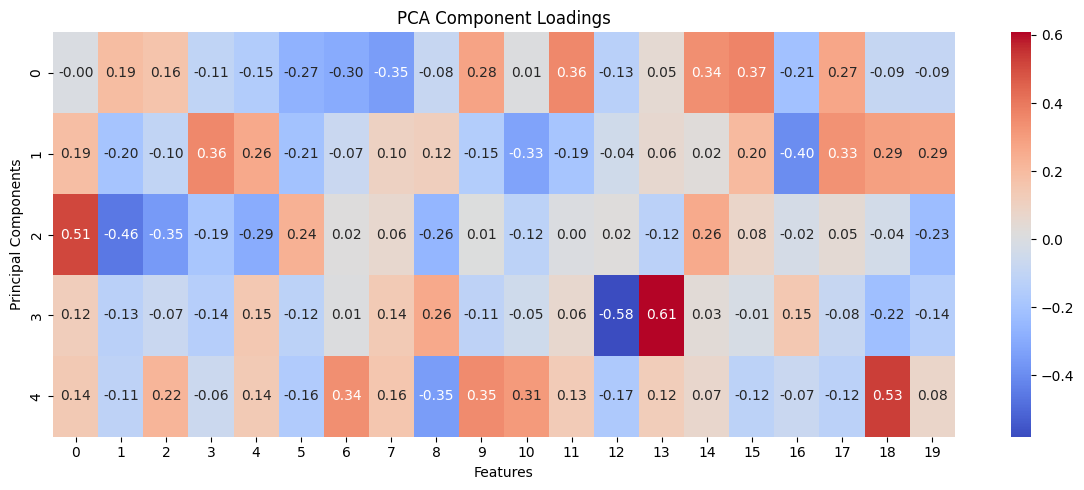

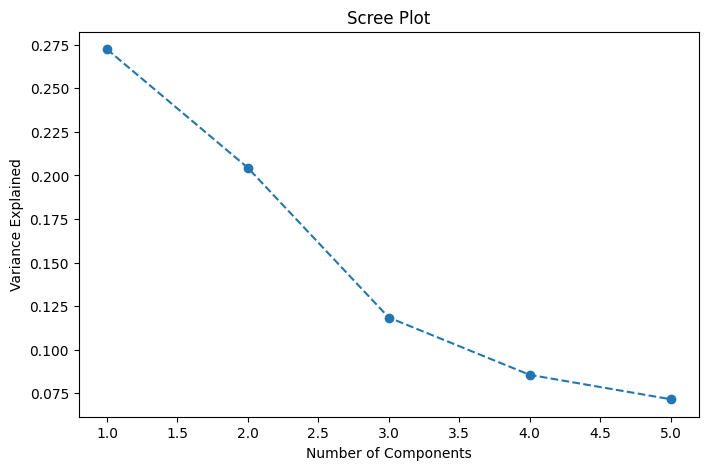

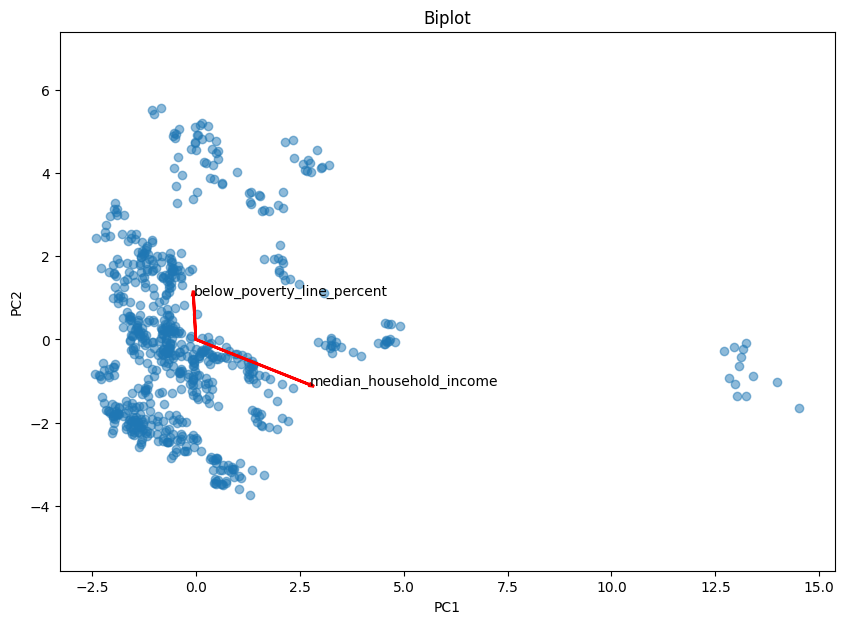

In [25]:
df = pd.read_csv('../udataset/state_data.csv')
df_numeric = df.drop(columns=['state', 'year'])

scaler = StandardScaler()
standardised_data = scaler.fit_transform(df_numeric)

pca = PCA(n_components = 5)
princ_comps = pca.fit_transform(standardised_data)

print(pca.explained_variance_ratio_)
print(pca.components_)

plt.figure(figsize=(12, 5))  # You can adjust the size as needed
sns.heatmap(pca.components_, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('PCA Component Loadings')
plt.ylabel('Principal Components')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()

scores = pca.transform(standardised_data)

plt.figure(figsize=(10,7))
plt.scatter(scores[:, 0], scores[:, 1], alpha=0.5)
for i, v in enumerate(pca.components_[0:2, :]):
    plt.arrow(0, 0, v[0]*max(scores[:,0]), v[1]*max(scores[:,1]), head_width=0.05, head_length=0.1, linewidth=2, color='red')
    plt.text(v[0]*max(scores[:,0]), v[1]*max(scores[:,1]), df_numeric.columns[i], color='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot')
plt.axis('equal')
plt.show()